# Exploratory Data Analysis

In [33]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load and Process the Data

### Load Data

In [103]:
## US Data ##

data = pd.read_csv("../data/covid_data.csv", dtype = str)

#Data types
data['date'] = pd.to_datetime(data['date'])
data['lat'] = pd.to_numeric(data['lat'])
data['long_'] = pd.to_numeric(data['long_'])
data['confirmed'] = pd.to_numeric(data['confirmed'])
data['deaths'] = pd.to_numeric(data['deaths'])

## Global Data ##
data_global = pd.read_csv("../data/covid_data_global.csv", dtype = str)

#Data types
data_global['date'] = pd.to_datetime(data_global['date'])
data_global['lat'] = pd.to_numeric(data_global['lat'])
data_global['long'] = pd.to_numeric(data_global['long'])
data_global['confirmed'] = pd.to_numeric(data_global['confirmed'])
data_global['deaths'] = pd.to_numeric(data_global['deaths'])


### Calculate Incident Cases

In [133]:
#US
data = data.sort_values(by = ['fips','date'])
data['prev_confirmed'] = data['confirmed'].shift(1) * \
    (data['fips'].fillna('') == \
     data['fips'].shift(1).fillna(''))
data['incident_cases'] = data.confirmed - data.prev_confirmed

#Global
data_global = data_global.sort_values(by = ['country_region','province_state','date'])
data_global['prev_confirmed'] = data_global['confirmed'].shift(1) * \
    (data_global['province_state'].fillna('') + data_global['country_region'].fillna('') == \
     data_global['province_state'].shift(1).fillna('') + data_global['country_region'].shift(1).fillna(''))
data_global['incident_cases'] = data_global.confirmed - data_global.prev_confirmed

#data_global.head(400)
#data.head(400)

### Preview the Data

In [134]:
data.head()

,uid,iso2,iso3,code3,fips,county,province_state,country_region,lat,long_,combined_key,confirmed,deaths,date,prev_confirmed,incident_cases
321,84010001,US,USA,840,10001,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-22,NaN,NaN
3574,84010001,US,USA,840,10001,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-23,0.0,0.0
6827,84010001,US,USA,840,10001,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-24,0.0,0.0
10080,84010001,US,USA,840,10001,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-25,0.0,0.0
13333,84010001,US,USA,840,10001,Kent,Delaware,US,39.086466,-75.568849,"Kent, Delaware, US",0,0,2020-01-26,0.0,0.0


## Time Trends

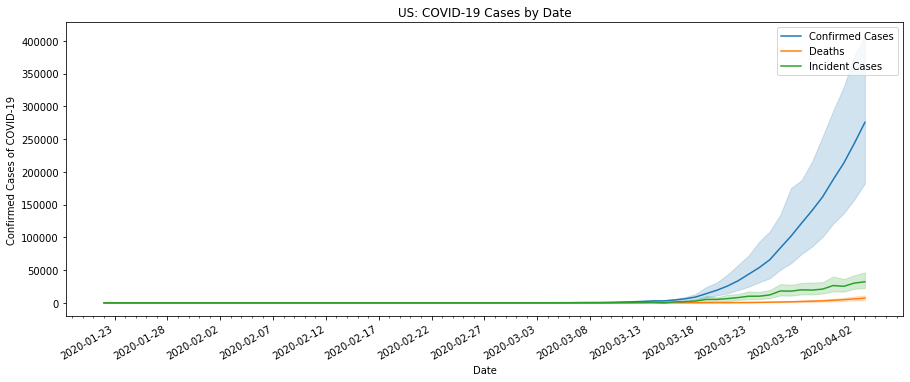

In [135]:
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x = data.date, y = data.confirmed, estimator = 'sum', label = 'Confirmed Cases')
sns.lineplot(x = data.date, y = data.deaths, estimator = 'sum', label = 'Deaths')
sns.lineplot(x = data.date, y = data.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("US: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

Xxx


## State Trends

### New York City Trends

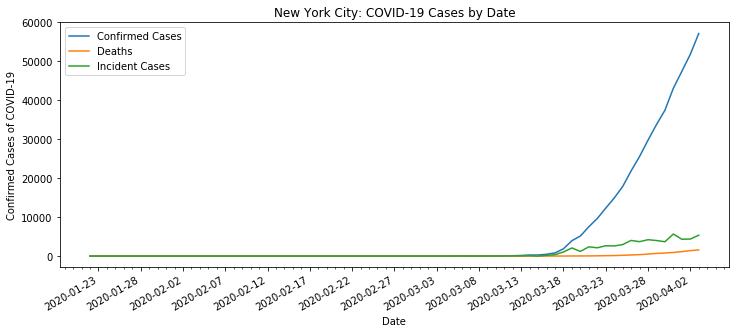

In [137]:
nyc = data[(data.province_state == 'New York') & (data.county == 'New York')]

fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(x = nyc.date, y = nyc.confirmed, estimator = 'sum', label = 'Confirmed Cases')
sns.lineplot(x = nyc.date, y = nyc.deaths, estimator = 'sum', label = 'Deaths')
sns.lineplot(x = nyc.date, y = nyc.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("New York City: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

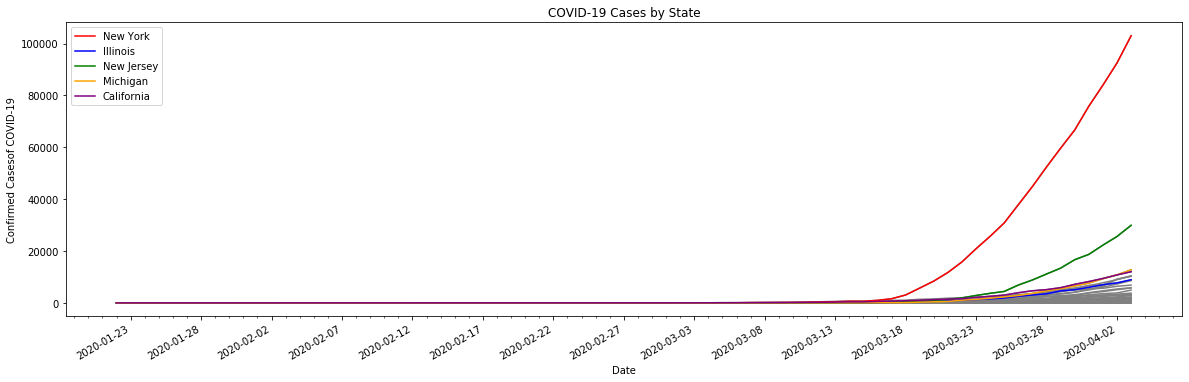

In [88]:

fig, ax = plt.subplots(figsize = (20,6))
#All states
for st in np.unique(data.province_state):
    sns.lineplot(x = data[data.province_state == st].date, y = data[data.province_state == st].confirmed, \
                 estimator = 'sum', err_style = None, color = "gray")
#Outlier states
for st, c in zip(["New York","Illinois","New Jersey","Michigan", "California"], \
                 ["red", "blue", "green", "orange", "purple"]):
    sns.lineplot(x = data[data.province_state == st].date, y = data[data.province_state == st].confirmed, \
                 label = st, estimator = 'sum', err_style = None, color = c)
#Labels
plt.title("COVID-19 Cases by State")
plt.xlabel("Date")
plt.ylabel("Confirmed Casesof COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();


xxx

In [89]:
data[data.date == '2020-04-02'].groupby(data.province_state).confirmed.sum().sort_values(ascending = False).head(10)

province_state
New York         92506
New Jersey       25590
Michigan         10791
California       10773
Louisiana         9159
Florida           9008
Massachusetts     8966
Illinois          7695
Pennsylvania      7268
Washington        6389
Name: confirmed, dtype: int64

In [90]:
data[data.date == '2020-04-02'].sort_values(by = ['confirmed'], axis = 0, ascending = False).head()


,uid,iso2,iso3,code3,fips,county,province_state,country_region,lat,long_,combined_key,confirmed,deaths,date
232826,84036061,US,USA,840,36061,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",51809,1397,2020-04-02
232855,84036119,US,USA,840,36119,Westchester,New York,US,41.162784,-73.757417,"Westchester, New York, US",11567,64,2020-04-02
232825,84036059,US,USA,840,36059,Nassau,New York,US,40.740665,-73.589419,"Nassau, New York, US",10587,76,2020-04-02
232847,84036103,US,USA,840,36103,Suffolk,New York,US,40.883201,-72.801217,"Suffolk, New York, US",8746,69,2020-04-02
231578,84017031,US,USA,840,17031,Cook,Illinois,US,41.841448,-87.816588,"Cook, Illinois, US",5575,107,2020-04-02


## Global Trends

### Italy

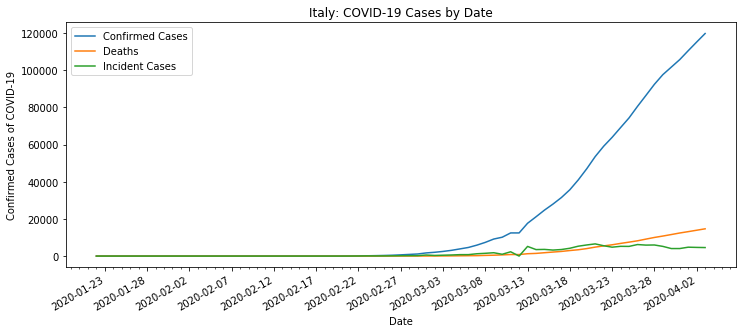

In [139]:
italy = data_global[data_global.country_region == 'Italy']

fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(x = italy.date, y = italy.confirmed, estimator = 'sum', label = 'Confirmed Cases')
sns.lineplot(x = italy.date, y = italy.deaths, estimator = 'sum', label = 'Deaths')
sns.lineplot(x = italy.date, y = italy.incident_cases, estimator = 'sum', label = 'Incident Cases')
#Labels
plt.title("Italy: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();

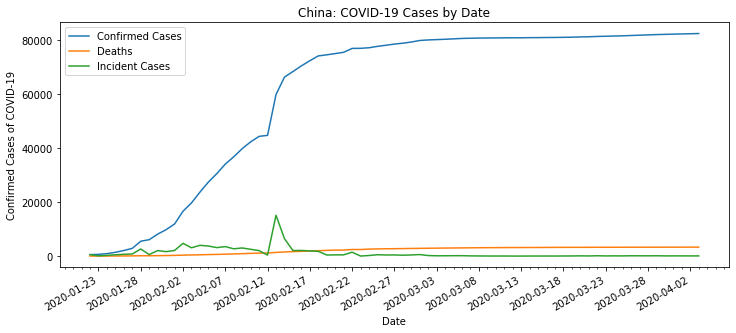

In [140]:
china = data_global[data_global.country_region == 'China']

fig, ax = plt.subplots(figsize = (12,5))
sns.lineplot(x = china.date, y = china.confirmed, estimator = 'sum', err_style = None, label = 'Confirmed Cases')
sns.lineplot(x = china.date, y = china.deaths, estimator = 'sum', err_style = None, label = 'Deaths')
sns.lineplot(x = china.date, y = china.incident_cases, estimator = 'sum', err_style = None, label = 'Incident Cases')
#Labels
plt.title("China: COVID-19 Cases by Date")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases of COVID-19")
#Format x-axis
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.show();